In [1]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd


#### 성능개선

- 가중치 초기화
- 활성화 함수 변경
- 옵티마이저 변경
- 정규화
- 드롭아웃

In [2]:
print('1. 데이터 세트 로드 - ')
print()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


1. 데이터 세트 로드 - 

4431872/4422102 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

X_train[0] imshow() 시각화 - 


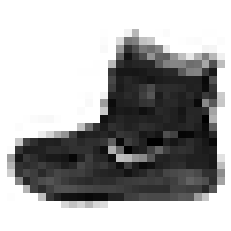



9


In [3]:
print('X_train[0] imshow() 시각화 - ')

plt.imshow(X_train[0],cmap = plt.cm.binary)

plt.grid(False)
plt.axis('off')
plt.show()
plt.close()
print()
print()
print(y_train[0])



In [4]:
print('02. 데이터 전처리 훈련/테스트 0.0 ~ 1.0 변환 - ')

X_train , X_test = X_train/255.0 , X_test/255.0



02. 데이터 전처리 훈련/테스트 0.0 ~ 1.0 변환 - 


In [5]:
print('03. 모델 구성 - Flatten - hidden(512 , relu) - output(10 , softmax) ')

fashion_model = Sequential()
fashion_model.add( Flatten( input_shape = (28, 28) ) )  
fashion_model.add( Dense(units = 512, activation = 'relu' ) )
fashion_model.add( Dense(units = 10 , activation = 'softmax') ) 


03. 모델 구성 - Flatten - hidden(512 , relu) - output(10 , softmax) 


In [6]:
print('04. 모델 컴파일 optimizer - adam , loss - sparse_categorical_crossentropy , metrics - accuracy')

fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 





04. 모델 컴파일 optimizer - adam , loss - sparse_categorical_crossentropy , metrics - accuracy


In [7]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('05. 모델 훈련 - epochs 10회')
fashion_model.fit(X_train , y_train , epochs=10  , verbose = 1)



05. 모델 훈련 - epochs 10회
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4739 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3606 - accuracy: 0.8691
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3222 - accuracy: 0.8802
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3010 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2803 - accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2652 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2515 - accuracy: 0.9062
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2415 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2293 - accuracy: 0.9130
Epoch 10/10
1875/1875 [==============================] - 6s

In [9]:
print('06. 모델정확도 평가 - ')

loss , accuracy = fashion_model.evaluate(X_test,y_test)
print('loss     - ' , loss)
print('accuracy - ' , accuracy)

06. 모델정확도 평가 - 
313/313 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8873
loss     -  0.3319692015647888
accuracy -  0.8873000144958496


In [10]:
print('07. 예측 - ')
y_pred = fashion_model.predict(X_test) 
print( y_pred[0])
print( np.argmax(y_pred[0]))

07. 예측 - 
[2.2255181e-10 4.0092265e-12 1.2831515e-10 8.1732702e-12 9.8864569e-11
 1.2565046e-04 4.1446975e-09 3.0229045e-03 4.3128414e-11 9.9685150e-01]
9


In [11]:
def basic_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 512, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

In [12]:
def hidden_layer_128_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 128, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

def hidden_layer_512_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 512, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model

def hidden_layer_1024_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 1024, activation = 'relu' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model

In [13]:
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4994 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3421 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3143 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2994 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2571 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2479 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [14]:
model_512 = hidden_layer_128_model()
history_512 = model_512.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4991 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3747 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3137 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2969 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2568 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [15]:
model_1024 = hidden_layer_128_model()
history_1024 = model_1024.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4969 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3735 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3360 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3128 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2809 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2692 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2477 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

각 모델의 에포크에 따른 정확도를 시각화 - 


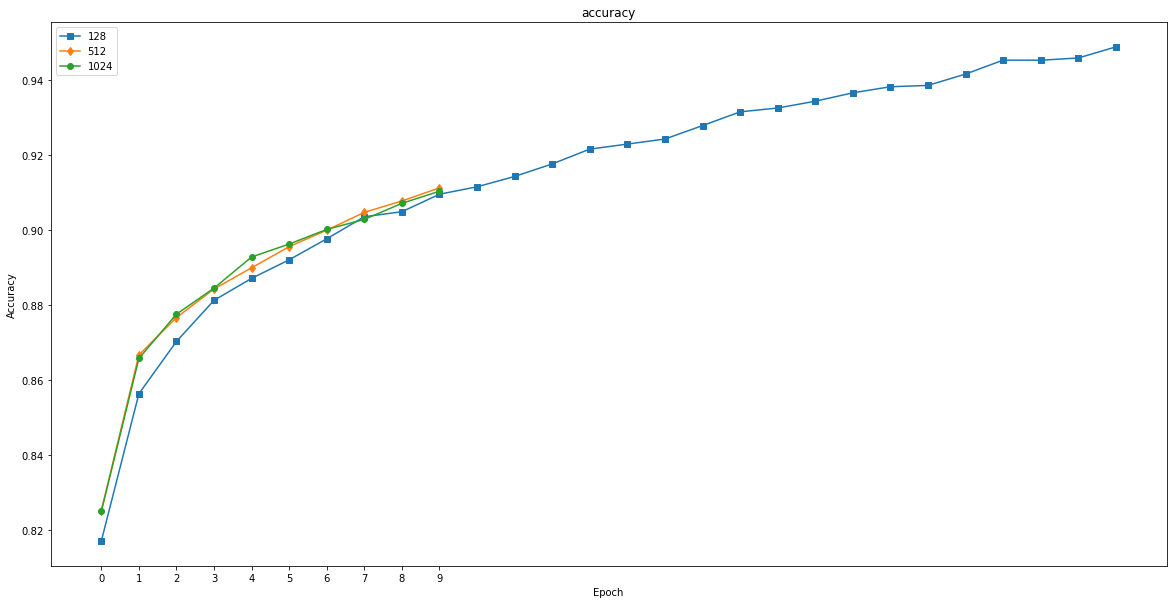

In [37]:
print('각 모델의 에포크에 따른 정확도를 시각화 - ')

plt.figure(figsize=(20,10))

plt.plot(history_128.history['accuracy'],'s-',label='128')
plt.plot(history_512.history['accuracy'],'d-',label='512')
plt.plot(history_1024.history['accuracy'],'o-',label='1024')

plt.legend(loc='best')
plt.xticks(np.arange(10))
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()


각 모델의 에포크에 따른 손실을   시각화 - 


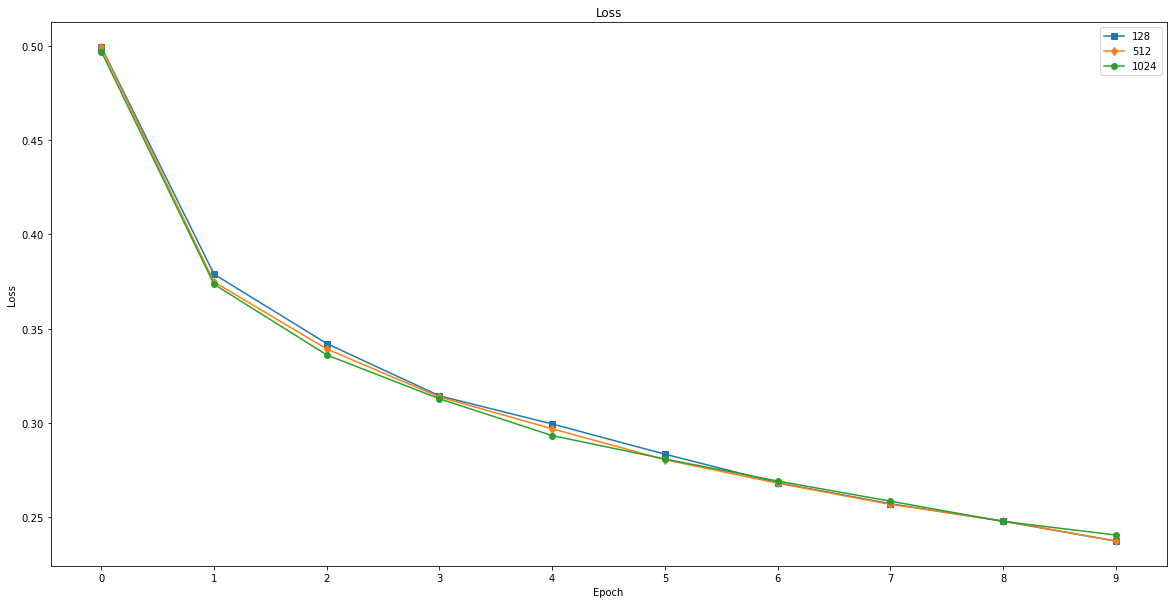

In [17]:
print('각 모델의 에포크에 따른 손실을   시각화 - ')
plt.figure(figsize=(20,10))

plt.plot(history_128.history['loss'],'s-',label='128')
plt.plot(history_512.history['loss'],'d-',label='512')
plt.plot(history_1024.history['loss'],'o-',label='1024')

plt.legend(loc='best')
plt.xticks(np.arange(10))
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()


In [18]:
print('loss 가 에포크 수행시 줄어들지 않는다면 중지시킬 수 있다( Callback , EarlyStopping ) - ')

class UserCallback(Callback) :
  def on_epoch_end(self , epoch , logs={}) :
    if logs.get('loss') < 0.3 :
      print('훈련을 중지합니다~~~~~왜? 그냥')
      self.model.stop_training = True 

loss 가 에포크 수행시 줄어들지 않는다면 중지시킬 수 있다( Callback , EarlyStopping ) - 


In [19]:
callbacks = UserCallback()

In [20]:
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=10  , verbose = 1 , callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4994 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3379 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3168 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8920


In [21]:
callbacks = [ EarlyStopping(monitor = 'val_accuracy' , patience = 10 )]
model_128 = hidden_layer_128_model()
history_128 = model_128.fit(X_train , y_train , epochs=100  , validation_split = 0.3 ,  verbose = 1 , callbacks=[callbacks])

Epoch 1/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5273 - accuracy: 0.8171 - val_loss: 0.4400 - val_accuracy: 0.8478
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3974 - accuracy: 0.8564 - val_loss: 0.4015 - val_accuracy: 0.8528
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3547 - accuracy: 0.8703 - val_loss: 0.3678 - val_accuracy: 0.8671
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3241 - accuracy: 0.8813 - val_loss: 0.3861 - val_accuracy: 0.8587
Epoch 5/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.8871 - val_loss: 0.3578 - val_accuracy: 0.8732
Epoch 6/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2906 - accuracy: 0.8921 - val_loss: 0.3377 - val_accuracy: 0.8775
Epoch 7/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2776 - accuracy: 0.8977 - val_loss: 0.3375 - val_ac

In [22]:

def hidden_layer_128_activation_model() :
  
  fashion_model = Sequential()
  fashion_model.add( Flatten( input_shape = (28, 28) ) )  
  fashion_model.add( Dense(units = 128, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = 'Adam', 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 



In [23]:
model_128 = hidden_layer_128_activation_model()
model_128.fit(X_train , y_train , epochs=10  , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5456 - accuracy: 0.8140
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3949 - accuracy: 0.8575
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3565 - accuracy: 0.8709
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3336 - accuracy: 0.8791
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8855
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2986 - accuracy: 0.8910
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2860 - accuracy: 0.8942
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.8990
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2627 - accuracy: 0.9031
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.253

In [24]:
print('case01 - 01. 데이터 세트 로드 - ')
print()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

case01 - 01. 데이터 세트 로드 - 



(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [25]:
print('행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - ')
print('1차원의 벡터로 변환 - ')
print('reshape 28 * 28 -> 784') 

X_train = X_train.reshape( X_train.shape[0] , -1)
X_test = X_test.reshape( X_test.shape[0] , -1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

행렬 형태는 퍼셉트론 모델의 피처로 사용이 부적합하다 - 
1차원의 벡터로 변환 - 
reshape 28 * 28 -> 784


In [26]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 784), (60000, 10)), ((10000, 784), (10000, 10)))

In [27]:
def fashion_mnist_model() :
  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, activation = 'sigmoid'  , input_shape = (784, ) ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )
  fashion_model.add( Dense(units = 50, activation = 'sigmoid' ) )

  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 


In [28]:
model          = fashion_mnist_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 2.3529 - accuracy: 0.1034 - val_loss: 2.3052 - val_accuracy: 0.0974
Epoch 2/100
165/165 [==============================] - 0s 3ms/step - loss: 2.3015 - accuracy: 0.1101 - val_loss: 2.3004 - val_accuracy: 0.1506
Epoch 3/100
165/165 [==============================] - 0s 3ms/step - loss: 2.2997 - accuracy: 0.1337 - val_loss: 2.2993 - val_accuracy: 0.1503
Epoch 4/100
165/165 [==============================] - 0s 3ms/step - loss: 2.2986 - accuracy: 0.1741 - val_loss: 2.2987 - val_accuracy: 0.1001
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 2.2976 - accuracy: 0.1465 - val_loss: 2.2972 - val_accuracy: 0.1948
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 2.2967 - accuracy: 0.2084 - val_loss: 2.2964 - val_accuracy: 0.1700
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 2.2958 - accuracy: 0.1965 - val_loss: 2.2953 - val_accuracy: 0.3084

Epoch 58/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5498 - accuracy: 0.4249 - val_loss: 1.5410 - val_accuracy: 0.4171
Epoch 59/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5303 - accuracy: 0.4185 - val_loss: 1.5212 - val_accuracy: 0.4976
Epoch 60/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5097 - accuracy: 0.4462 - val_loss: 1.5015 - val_accuracy: 0.4140
Epoch 61/100
165/165 [==============================] - 0s 2ms/step - loss: 1.4876 - accuracy: 0.4281 - val_loss: 1.4776 - val_accuracy: 0.4301
Epoch 62/100
165/165 [==============================] - 0s 3ms/step - loss: 1.4648 - accuracy: 0.4470 - val_loss: 1.4551 - val_accuracy: 0.4349
Epoch 63/100
165/165 [==============================] - 0s 2ms/step - loss: 1.4427 - accuracy: 0.4367 - val_loss: 1.4327 - val_accuracy: 0.4379
Epoch 64/100
165/165 [==============================] - 0s 2ms/step - loss: 1.4201 - accuracy: 0.4553 - val_loss: 1.4111 - val_accuracy:

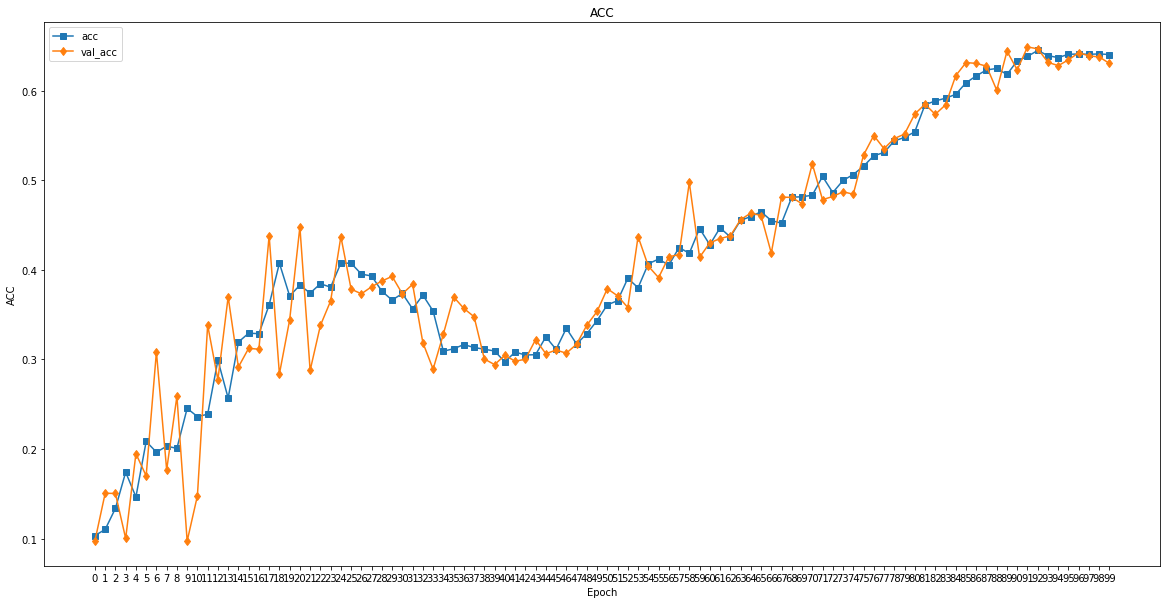

In [29]:
plt.figure(figsize=(20,10))

plt.plot(model_history.history['accuracy'],'s-',label='acc')
plt.plot(model_history.history['val_accuracy'],'d-',label='val_acc')


plt.legend(loc='best')
plt.xticks(np.arange(100))

plt.title('ACC')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.show()
plt.close()

In [30]:
print('정규화 - ')

def fashion_mnist_normalization_model() :
  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, input_shape = (784, ) ) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 50) )
  fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )

  fashion_model.add( Dense(units = 10 , activation = 'softmax') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

정규화 - 


In [31]:
model          = fashion_mnist_normalization_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

Epoch 1/100
165/165 [==============================] - 2s 4ms/step - loss: 1.8698 - accuracy: 0.5108 - val_loss: 2.1975 - val_accuracy: 0.3347
Epoch 2/100
165/165 [==============================] - 1s 3ms/step - loss: 1.4915 - accuracy: 0.7047 - val_loss: 1.7194 - val_accuracy: 0.7130
Epoch 3/100
165/165 [==============================] - 1s 3ms/step - loss: 1.3110 - accuracy: 0.7323 - val_loss: 1.3162 - val_accuracy: 0.7415
Epoch 4/100
165/165 [==============================] - 1s 3ms/step - loss: 1.1818 - accuracy: 0.7518 - val_loss: 1.1338 - val_accuracy: 0.7606
Epoch 5/100
165/165 [==============================] - 1s 3ms/step - loss: 1.0811 - accuracy: 0.7683 - val_loss: 1.0317 - val_accuracy: 0.7744
Epoch 6/100
165/165 [==============================] - 1s 3ms/step - loss: 0.9988 - accuracy: 0.7810 - val_loss: 0.9569 - val_accuracy: 0.7840
Epoch 7/100
165/165 [==============================] - 1s 3ms/step - loss: 0.9306 - accuracy: 0.7899 - val_loss: 0.8989 - val_accuracy: 0.7913

Epoch 58/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3898 - accuracy: 0.8718 - val_loss: 0.4389 - val_accuracy: 0.8506
Epoch 59/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8732 - val_loss: 0.4461 - val_accuracy: 0.8470
Epoch 60/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8737 - val_loss: 0.4145 - val_accuracy: 0.8586
Epoch 61/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8739 - val_loss: 0.4638 - val_accuracy: 0.8357
Epoch 62/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8747 - val_loss: 0.4199 - val_accuracy: 0.8581
Epoch 63/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8753 - val_loss: 0.4256 - val_accuracy: 0.8551
Epoch 64/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8763 - val_loss: 0.4177 - val_accuracy:

In [32]:
print('드롭아웃 - ')
print('배치정규화는 내부적으로 규제가 적용되어 있어서 드롭아웃을 적용할 필요가 없다 - ')

def fashion_mnist_dropout_model() :

  fashion_model = Sequential()
  fashion_model.add( Dense(units = 50, input_shape = (784, )  , kernel_initializer = 'he_normal') )
  # fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 50 ,  kernel_initializer = 'he_normal') )
  # fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )


  fashion_model.add( Dense(units = 50 ,  kernel_initializer = 'he_normal') )
  #fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 50 , kernel_initializer = 'he_normal') )
  #fashion_model.add( BatchNormalization() )
  fashion_model.add( Activation('sigmoid') )
  fashion_model.add( Dropout(0.2) )

  fashion_model.add( Dense(units = 10 , activation = 'softmax' , kernel_initializer = 'he_normal') )

  fashion_model.compile(optimizer = SGD(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 
  
  return fashion_model 

드롭아웃 - 
배치정규화는 내부적으로 규제가 적용되어 있어서 드롭아웃을 적용할 필요가 없다 - 


In [33]:
model          = fashion_mnist_dropout_model()
model_history = model.fit(X_train , y_train , epochs=100  , verbose = 1 , batch_size = 256 , validation_split = 0.3)

Epoch 1/100
165/165 [==============================] - 1s 5ms/step - loss: 2.4070 - accuracy: 0.1016 - val_loss: 2.2942 - val_accuracy: 0.1004
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3589 - accuracy: 0.1059 - val_loss: 2.2862 - val_accuracy: 0.2072
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3491 - accuracy: 0.1080 - val_loss: 2.2813 - val_accuracy: 0.1916
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3400 - accuracy: 0.1143 - val_loss: 2.2768 - val_accuracy: 0.2221
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3331 - accuracy: 0.1141 - val_loss: 2.2721 - val_accuracy: 0.3204
Epoch 6/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3285 - accuracy: 0.1150 - val_loss: 2.2677 - val_accuracy: 0.3457
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 2.3222 - accuracy: 0.1160 - val_loss: 2.2627 - val_accuracy: 0.3362

Epoch 58/100
165/165 [==============================] - 1s 4ms/step - loss: 1.4528 - accuracy: 0.3842 - val_loss: 1.3243 - val_accuracy: 0.5100
Epoch 59/100
165/165 [==============================] - 1s 4ms/step - loss: 1.4388 - accuracy: 0.3849 - val_loss: 1.3087 - val_accuracy: 0.5173
Epoch 60/100
165/165 [==============================] - 1s 4ms/step - loss: 1.4246 - accuracy: 0.3928 - val_loss: 1.2946 - val_accuracy: 0.5273
Epoch 61/100
165/165 [==============================] - 1s 4ms/step - loss: 1.4117 - accuracy: 0.3938 - val_loss: 1.2779 - val_accuracy: 0.5226
Epoch 62/100
165/165 [==============================] - 1s 4ms/step - loss: 1.3982 - accuracy: 0.3988 - val_loss: 1.2627 - val_accuracy: 0.5078
Epoch 63/100
165/165 [==============================] - 1s 4ms/step - loss: 1.3853 - accuracy: 0.3985 - val_loss: 1.2502 - val_accuracy: 0.5252
Epoch 64/100
165/165 [==============================] - 1s 4ms/step - loss: 1.3740 - accuracy: 0.4040 - val_loss: 1.2403 - val_accuracy:

#### 자연어 처리 

- 문자? -> ASCII 인코딩 'LISTEN' , 'SILENT' -> NN 입력으로 사용이 부적합


In [34]:
print('단어 기반 인코딩 - ')
print()
sentences = [
  'I love my student' , 
  'I love my dog' , 
  'You love my dog?' ,   
  'toi hoc tieng Viet khong a'         
]

tokenizer = Tokenizer(num_words = 100 , oov_token='<OOV>')

# 단어기반 인덱싱
tokenizer.fit_on_texts(sentences)
# Bags of Words(BOW)
word_index = tokenizer.word_index


# 문장기반 인덱싱
sequences = tokenizer.texts_to_sequences(sentences)
padding   = pad_sequences(sequences , padding='pre' , maxlen = 5 , truncating = 'pre')


print(word_index)
print(sequences)
print(padding)
# test_sentences = [
#   'I love my son'            
# ]

# test_sequences = tokenizer.texts_to_sequences(sentences)
# print(test_sequences)

# 문장의 길이가 다른 경우 문장의 길이를 같은 길이로 만들어야 한다!!



단어 기반 인코딩 - 

{'<OOV>': 1, 'love': 2, 'my': 3, 'i': 4, 'dog': 5, 'student': 6, 'you': 7, 'toi': 8, 'hoc': 9, 'tieng': 10, 'viet': 11, 'khong': 12, 'a': 13}
[[4, 2, 3, 6], [4, 2, 3, 5], [7, 2, 3, 5], [8, 9, 10, 11, 12, 13]]
[[ 0  4  2  3  6]
 [ 0  4  2  3  5]
 [ 0  7  2  3  5]
 [ 9 10 11 12 13]]


In [38]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [39]:
import json

with open('/tmp/sarcasm.json' , 'r') as  f :
  datasets = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/sarcasm.json'

In [40]:
sentences = []
target    = []
urls      = []

for row in datasets :
  sentences.append( row['headline']) 
  target.append( row['is_sarcastic'])

  urls.append(row['article_link'])


NameError: name 'datasets' is not defined

In [41]:
sentences = np.array(sentences)
target    = np.array(target).reshape(-1,1)

In [42]:
print( type(sentences) )
print( type(target))
print( sentences.shape )
print( target.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0,)
(0, 1)


In [43]:
tokenizer = Tokenizer(oov_token='<OOV>')

# 단어기반 인덱싱
tokenizer.fit_on_texts(sentences)
# Bags of Words(BOW)
word_index = tokenizer.word_index


# 문장기반 인덱싱
sequences = tokenizer.texts_to_sequences(sentences)
padding   = pad_sequences(sequences , padding='post' , maxlen = 40 )


print(word_index )
print(sequences[0])
print(padding[0])
print(padding.shape)
print()
print(target)

{'<OOV>': 1}


IndexError: list index out of range

In [44]:
vocab_size = max(word_index.values()) +1
# vocab_size = 30000
embedding_dim = 40
max_length = 40 
nlp_model = Sequential()

nlp_model.add( Embedding(vocab_size , embedding_dim , input_length = max_length) )  
nlp_model.add( Dense(units = 6, activation  = 'relu' ) )
nlp_model.add( Dense(units = 1 , activation = 'sigmoid') )


In [45]:
nlp_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 40)            80        
                                                                 
 dense_29 (Dense)            (None, 40, 6)             246       
                                                                 
 dense_30 (Dense)            (None, 40, 1)             7         
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [46]:
nlp_model.compile(optimizer = 'adam' , 
                  loss = 'binary_crossentropy' , 
                  metrics = ['accuracy'])


In [47]:
# print( padding.shape )
# print( target.shape)

nlp_model.fit(padding , target , epochs = 10 , verbose = 1)

Epoch 1/10


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.